> Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s

# The Architecture of the Visual Cortex

David H. Hubel and Torsten Wiesel performed a series of experiments on cats in [1958](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1357023/pdf/jphysiol01301-0020.pdf) and [1959](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1363130/pdf/jphysiol01298-0128.pdf) [and a few years later on monkeys](https://physoc.onlinelibrary.wiley.com/doi/pdf/10.1113/jphysiol.1968.sp008455), giving crucial insights into the structure of the visual cortex

Many neurons in the visual cortex have a small **local receptive field,** meaning they **react only to visual stimuli located in a limited region of the visual field** (see Figure 14-1, in which the local receptive fields of five neurons are represented by dashed circles)

The receptive fields of different neurons may overlap, and together they tile the whole visual field

Moreover, some neurons react only to images of horizontal lines. **Some neurons have larger receptive fields,** and they react to more complex patterns that are combinations of the **lower-level patterns**

**The higher level neurons are based on the outputs of neighboring lower-level neurons** (in Figure 14-1, notice that each neuron is connected only to a few neurons from the previous layer)

This powerful architecture is able to detect all sorts of complex patterns in any area of the visual field



<p align='center'>
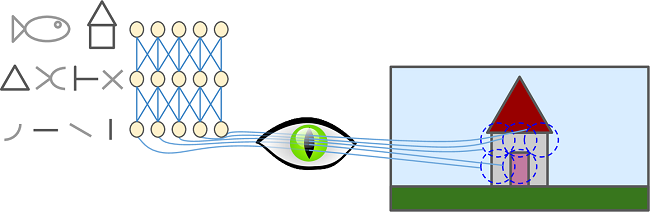
</p>

Figure 14-1. Biological neurons in the visual cortex respond to specific patterns in small regions of the visual field called receptive fields; as the visual signal makes its way through consecutive brain modules, neurons respond to more complex patterns in larger receptive fields

These studies of the visual cortex inspired the [neocognitron](https://www.cs.princeton.edu/courses/archive/spr08/cos598B/Readings/Fukushima1980.pdf), introduced in 1980, which gradually evolved into what we now call convolutional neural networks

An important milestone was a [1998 paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann LeCun et al. that introduced the famous LeNet-5 architecture, widely used by banks to recognize handwritten check numbers

# Convolutional Layers

The most important building block of a CNN is the convolutional layer: **neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields** (see Figure 14-2)

In turn, **each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer**

This architecture allows the network to **concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer,** and so on

<p align='center'>
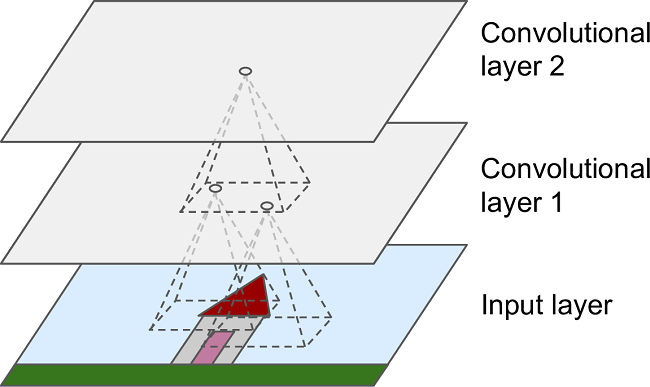
</p>
Figure 14-2. CNN layers with rectangular local receptive fields

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h - 1$, columns $j$ to $j + f_w - 1$, where $f_h$ and $f_w$ are the height and width of the receptive field (see Figure 14-3)

**In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram.** This is called **zero padding**

<p align='center'>
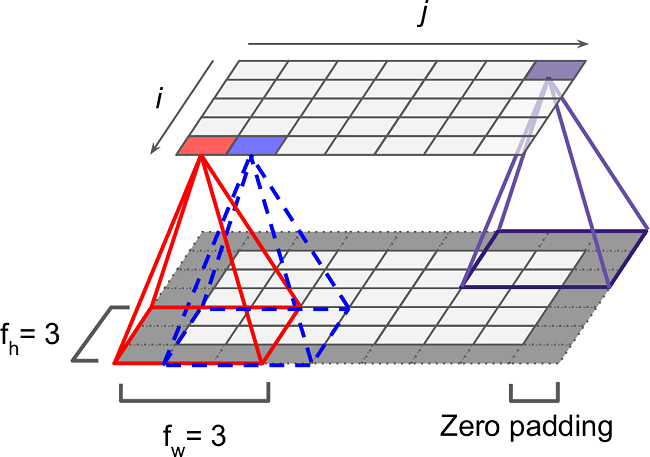
</p>
Figure 14-3. Connections between layers and zero padding

It is also **possible to connect a large input layer to a much smaller layer by spacing out the receptive fields,** as shown in Figure 14-4. This dramatically **reduces** the model’s **computational complexity**

The **shift** from one receptive field to the next is called the **stride**

In the diagram, a $5 \times 7$ input layer (plus zero padding) is connected to a $3 \times 4$ layer, using $3 \times 3$ receptive fields and a stride of 2

A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i \times s_h$ to $i \times s_h + f_h - 1$, columns $j \times s_w$ to $j \times s_w + f_w - 1$, where $s_h$ and $s_w$ are the vertical and horizontal strides

<p align='center'>
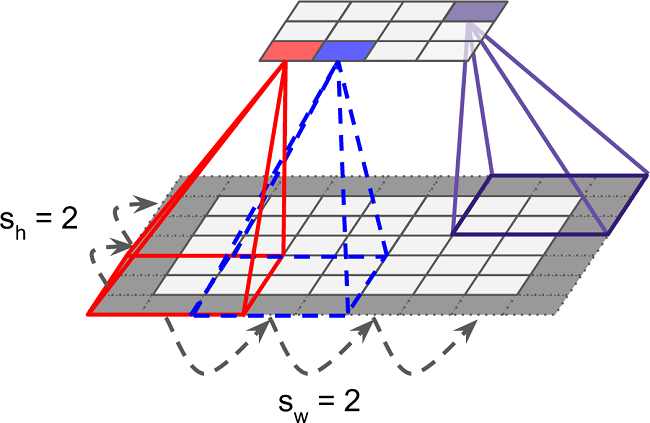
</p>
Figure 14-4. Reducing dimensionality using a stride of 2

## Filters

**A neuron’s weights can be represented as a small image the size of the receptive field**. For example, Figure 14-5 shows two possible sets of weights, called **filters (or convolution kernels)**

The first one is represented as a black square with a vertical white line in the middle (it is a $7 \times 7$ matrix full of 0s except for the central column, which is full of 1s);

**Neurons using these weights will ignore everything in their receptive field except for the central vertical line** (since all inputs will get multiplied by 0, except for the ones located in the central vertical line)

The second filter is a black square with a horizontal white line in the middle. Once again, neurons using these weights will ignore everything in their receptive field except for the central horizontal line

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 14-5 (the bottom image), the layer will output the top-left image. **Notice that the vertical white lines get enhanced while the rest gets blurred**

Similarly, the upper-right image is what you get if all neurons use the same **horizontal line filter;** notice that the **horizontal white lines get enhanced while the rest is blurred out**

Thus, **a layer full of neurons using the same filter outputs a feature map,** which **highlights the areas in an image that activate the filter the most**

Of course, you do not have to define the filters manually: instead, **during training the convolutional layer will automatically learn the most useful filters for its task,** and the layers above will **learn to combine them into more complex patterns**






<p align='center'>
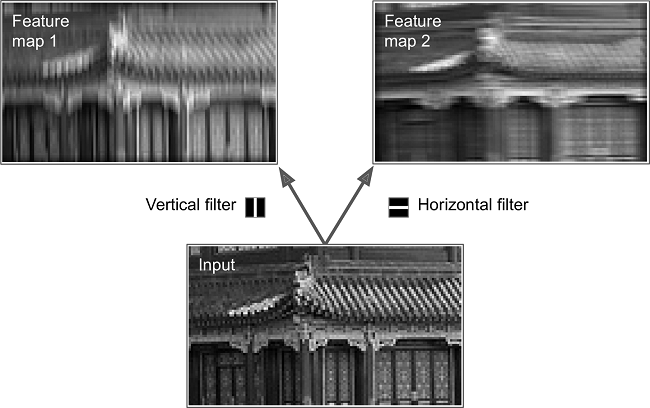
</p>
Figure 14-5. Applying two different filters to get two feature maps

## Stacking Multiple Feature Maps

In reality a convolutional layer has multiple filters (you decide how many) and outputs one feature map per filter, so it is **more accurately represented in 3D** (see Figure 14-6)

**It has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters **(i.e., the same weights and bias term)

Neurons in different feature maps use different parameters. A neuron’s receptive field is the same as described earlier, but it extends across all the previous layers’ feature maps

In short, **a convolutional layer simultaneously applies multiple trainable filters to its inputs,** making it capable of detecting multiple features anywhere in its inputs

**Input images are also composed of multiple sublayers: one per color channel.** There are typically three: red, green, and blue (RGB). **Grayscale images have just one channel,** but some images may have much more—for example, satellite images that capture extra light frequencies (such as infrared)

<p align='center'>
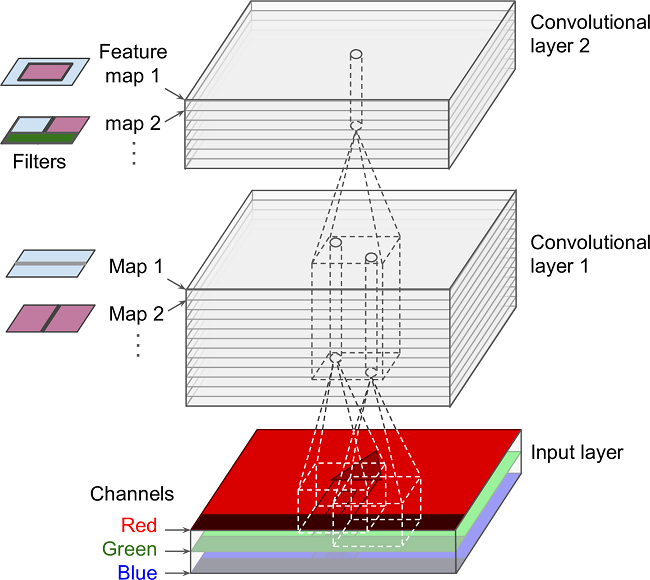
</p>
Figure 14-6. Convolutional layers with multiple feature maps, and images with three color channels

Specifically, a neuron located in row $i$ column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l - 1$, located in **rows $i \times s_h$ to $i \times s_h + f_h - 1$ and columns $j \times s_w$ to $j \times s_w + f_w - 1$,** across all feature maps (in layer l – 1)

Note that **all neurons located in the same row i and column j but in different feature maps are connected to the outputs of the exact same neurons in the previous layer**

Equation 14-1 summarizes the preceding explanations in one big mathematical equation: it shows how to compute the output of a given neuron in a convolutional layer

**All it does is calculate the weighted sum of all the inputs, plus the bias term**

Equation 14-1. Computing the output of a neuron in a convolutional layer

<p align='center'>
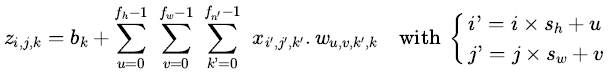
</p>

In this equation:

* $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer (layer $l$)

* As explained earlier, $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n'}$ is the number of feature maps in the previous layer (layrer $l - 1$)

* $x_{i', j', k'}$ is the output of the neuron located in layer $l - 1$, row $i'$, column $j'$, feature map $k'$ (or channel $k′$ if the previous layer is the input layer)

* $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map k 

* $w_{u, v, k', k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k′$

## TensorFlow Implementation

In TensorFlow, **each input image is typically represented as a 3D tensor of shape [height, width, channels]**

A **mini-batch** is represented as a **4D tensor** of shape **[mini-batch size, height, width, channels]**

The **weights** of a convolutional layer are represented as a **4D tensor of shape $[f_h , f_w , f_{n'} , f_n ]$**

The **bias** terms of a convolutional layer are simply represented as a **1D tensor of shape $[f_n]$**

Let’s look at a simple example. The following code **loads two sample images,** using Scikit-Learn’s load_simple_image(), then it **creates two filters and applies them to both images,** and finally it displays one of the resulting feature maps:

In [30]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Text(0.5, 1.0, 'Horizontal Line')

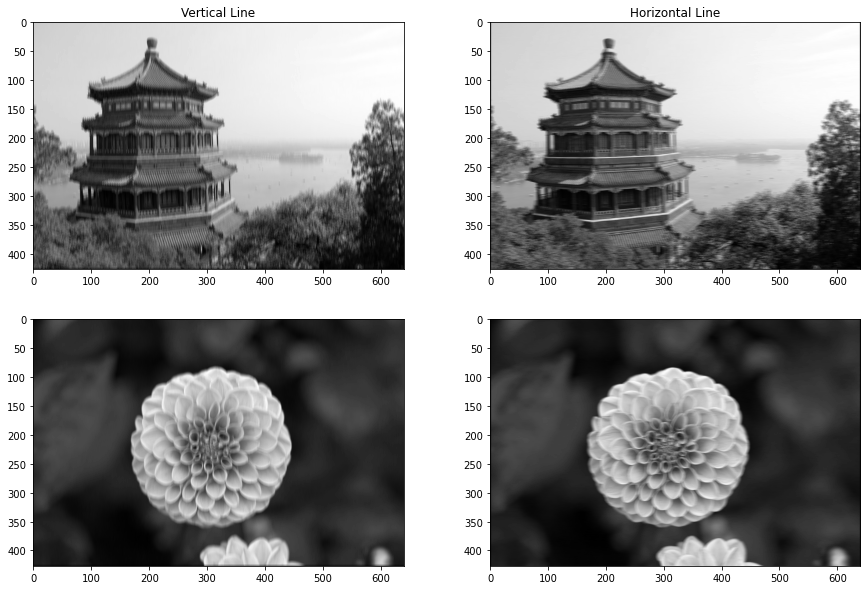

In [73]:
# Load sample images
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(outputs[0, :, :, 0], cmap='gray')
axs[0, 1].imshow(outputs[0, :, :, 1], cmap='gray') # plot 1st image's 2nd feature map
axs[1, 0].imshow(outputs[1, :, :, 0], cmap='gray')
axs[1, 1].imshow(outputs[1, :, :, 1], cmap='gray')
axs[0, 0].set_title('Vertical Line')
axs[0, 1].set_title('Horizontal Line')

Let’s go through this code: